# **Assignment : Crash Course in Causality Crash Course in Causality Written Section**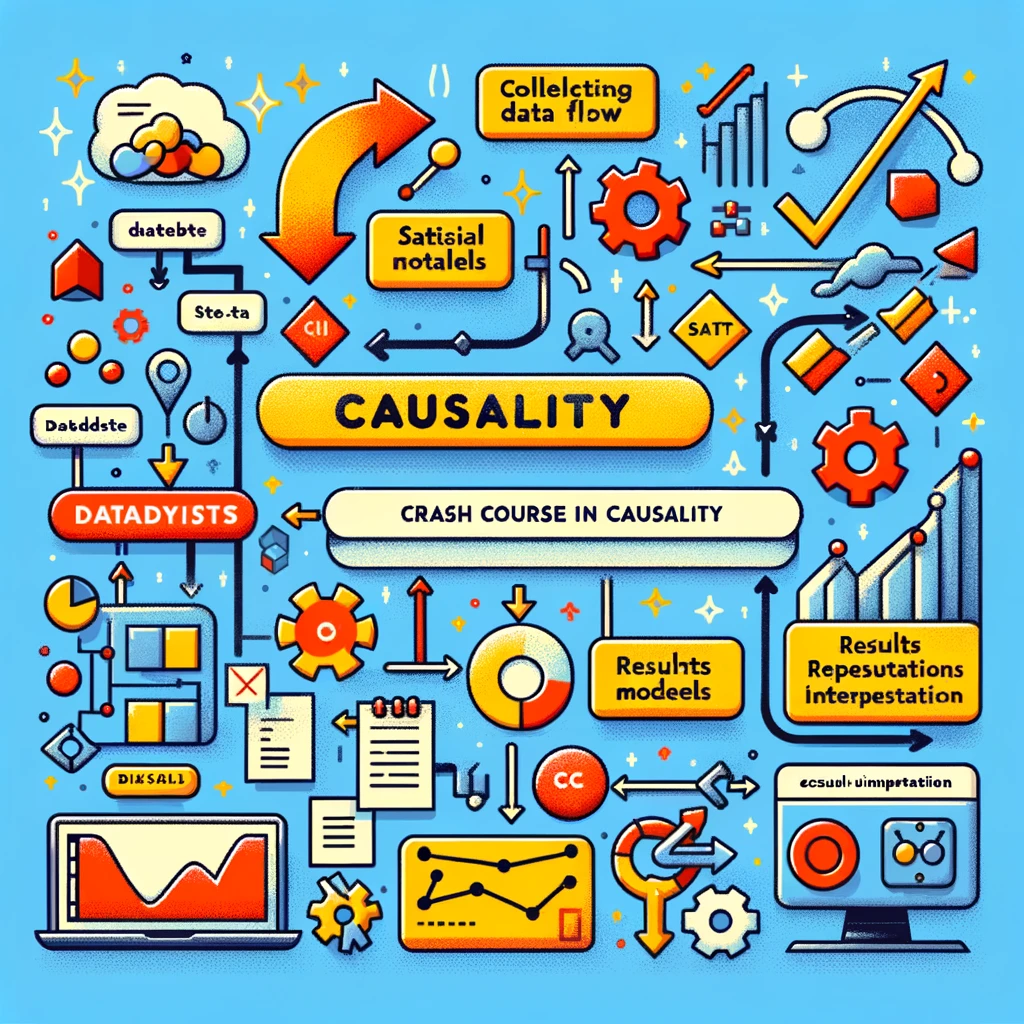

## **Objective:**
* **What is the question being researched?**
The research question focuses on identifying the causal factors that lead to customer churn in the telecommunications sector. Specifically, it seeks to understand which customer attributes or experiences directly cause customers to leave their telecom provider.

* **Why is it interesting?**
This question is fascinating because understanding the causal factors behind customer churn can significantly impact a company's bottom line. By pinpointing the exact reasons behind churn, telecom companies can tailor their strategies to improve customer retention, enhance satisfaction, and ultimately, secure a competitive edge in the market. This inquiry not only holds potential for direct business applications but also contributes to the broader understanding of consumer behavior and decision-making processes in a service-oriented context.

* **What is the theory behind it?**
The theoretical foundation of this research lies in causal inference theory, which seeks to establish cause-and-effect relationships beyond mere associations observed in data. It draws from principles in economics, psychology, and statistics to model how specific changes in customer experiences or perceptions (e.g., pricing, service quality, customer service interactions) lead to the decision to churn. This approach involves distinguishing between correlation and causation—ensuring that the identified factors are not just associated with churn but are its actual causes. Through methodologies like instrumental variable analysis or propensity score matching, the study aims to rigorously isolate and measure the impact of individual variables on churn, providing a solid basis for effective intervention strategies.

# **ABSTRACT**

This analysis delves into the pivotal factors influencing customer churn within the telecommunications sector, utilizing the Telco Customer Churn dataset from IBM on Kaggle. The primary objective is to uncover the underlying causes of customer departure through a detailed exploration of customer data, including demographics, service usage patterns, and financial commitments. Employing a combination of data preparation techniques, exploratory data analysis (EDA), and logistic regression for causal inference, this study seeks to quantify the impact of various customer attributes on the likelihood of churn. The logistic regression model serves as a straightforward yet powerful tool for estimating the effect of different predictors while controlling for confounding variables, offering insights into the relative importance of each factor. By understanding the key drivers of churn, telecommunications companies can devise targeted interventions to improve customer retention, thereby enhancing business sustainability and customer satisfaction. This analysis not only highlights the significance of data-driven decision-making in the telecommunications industry but also showcases the application of causal inference techniques in addressing complex business challenges.

# **CAUSALITY: An Introduction**



Causality goes beyond correlation or statistical dependency to describe the causal connections of a system.

A variable, X, can be said to cause another variable, Y, if when all confounders are adjusted, an intervention in X results in a change in Y, but an intervention in Y does not necessarily result in a change in X [1]. This is in contrast to correlations, which are inherently symmetric i.e. if X correlates with Y, Y correlates with X, while if X causes Y, Y may not cause X.

Causality is represented mathematically via Structural Causal Models (SCMs). The two key elements of SCMs are a **graph and a set of equations**.
1.  the graph is a Directed Acyclic Graphs (DAG)
2.  the set of equations is a Structural Equation Model (SEM).

* DAGs represent causal structure by showing who listens to whom or, more importantly, who doesn’t listen to whom. A DAG is a special kind of graph for which all edges are directed (information flow is in one direction) and no cycles exist (information that leaves a vertex cannot return to it). The vertices (circles) in a causal DAG represent variables and edges (arrows) represent causation, where a variable is directly caused by its parents.

* SEMs represent relationships between variables. These equations have two peculiarities. First, equations are asymmetric, meaning equality only works in one direction. This has the implication that SEMs cannot be inverted to derive alternative SEM equations. Second, equations can be non-parametric, meaning the functional form is not known.

Notice, at face value, an SEM can contain more information than a DAG. DAGs outline causal connections, while SEMs can show the relationship's causal connections and details. Although DAGs may seem unnecessary from this perspective, there is tremendous value in seeing the causal relationships in a clear-cut way through DAGs that aren’t so obvious via SEMs. Additionally, the choice of the DAG representation ultimately unlocked the method of d-separation for evaluating causal effects.

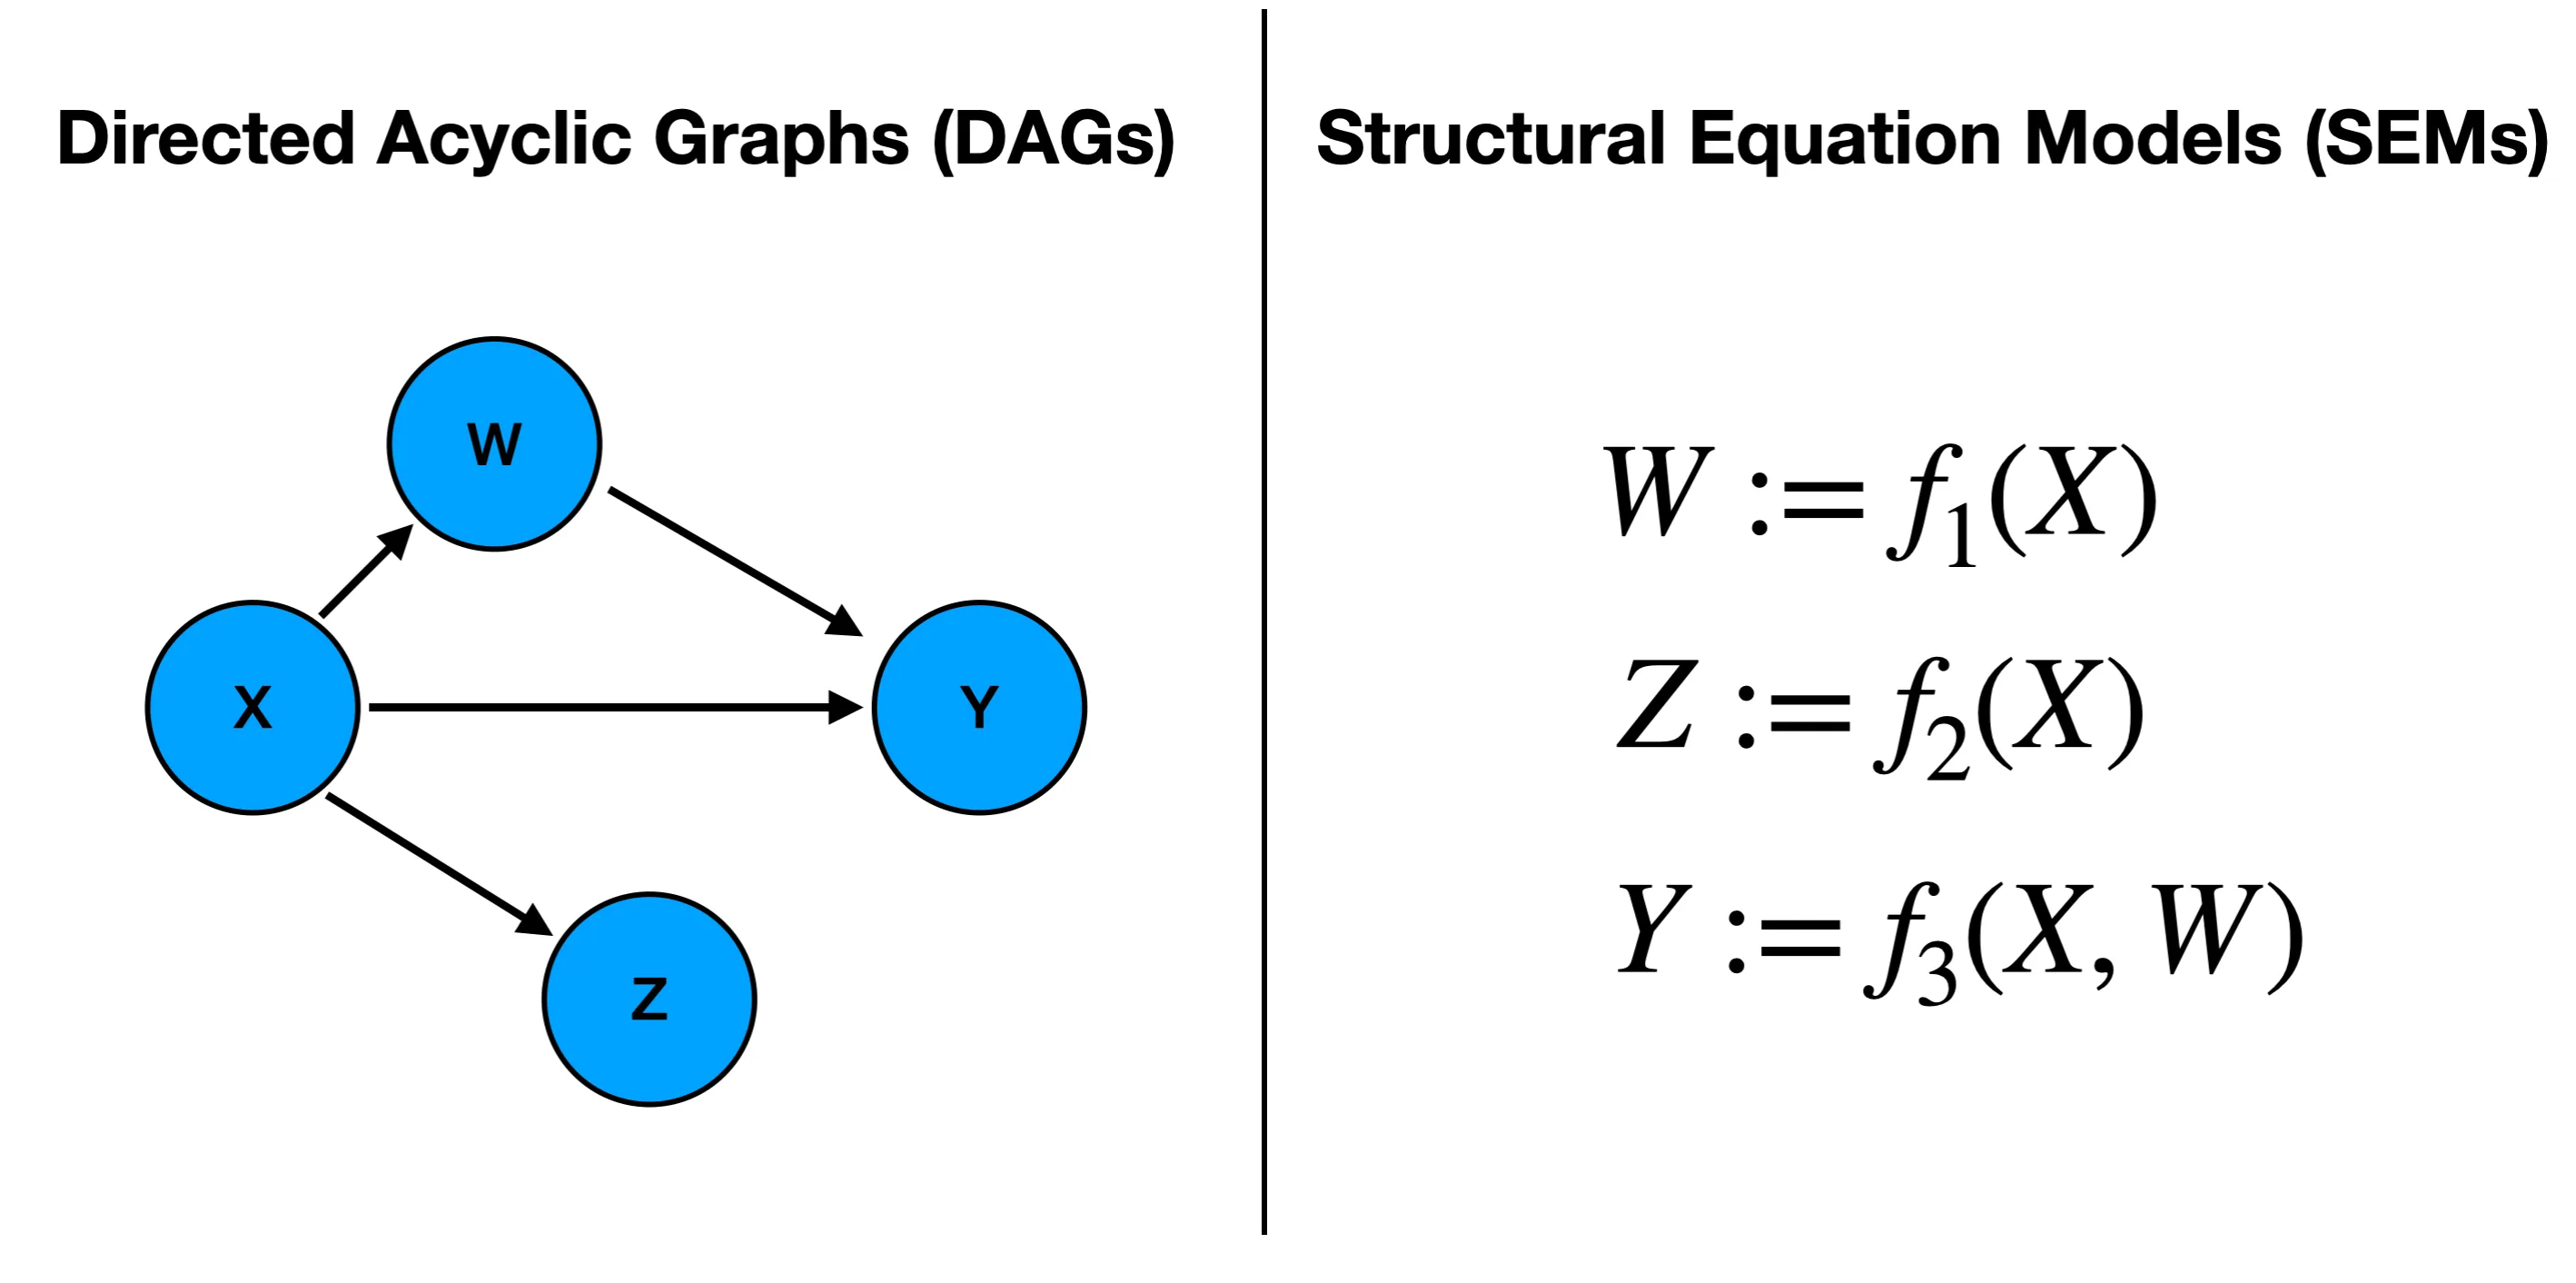

## **Why Machine Learning Needs Causality ?**

Machine learning boils down to a large pattern recognition system, which leverages the power of associations and correlations in the setting of independent and identically distributed data (i.i.d). In other words, machine learning sees things, assumes them to be true relationships, and extrapolates its decisions on the future based on these past experiences.

This recognition and exploitation of associations leads to undoubtedly powerful predictions, yet it encounters a fundamental challenge. Real-world data often does not fulfill the conditions necessary for stable prediction outcomes across scenarios. In computer vision for example, the test set distribution might differ fundamentally from the training distribution due to changes in the light conditions, the quality of the camera, or its viewpoint. These changes, however, contain the potential for completely defeating or at least heavily impacting the accuracy and usefulness of the trained model.

On the other hand, understanding the mechanism between a cause and its effect enables causal models to cover a range of distributions, one for each possible intervention, or perform reliable predictions under a change in the environment. In contrast, purely statistical learning models, which are based on the i.i.d.- assumption, only allow for one general population distribution and do not offer this flexibility, making them less generalizable.

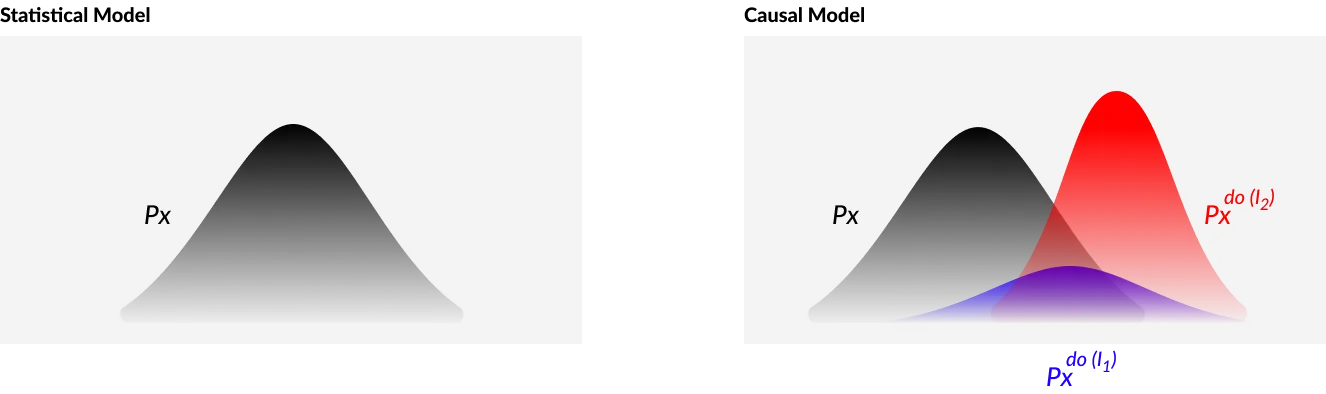



Causality refers to the study and determination of **cause-and-effect relationships between variables**. Unlike mere correlation, which only indicates that two variables move together in some way without implying a cause-and-effect relationship, causality seeks to identify how and why changes in one variable directly influence changes in another. This distinction is crucial in many fields, including economics, medicine, public policy, and social sciences, where understanding the impact of interventions, policies, or treatments is essential.

## **Causality vs. Correlation**

* Correlation: A statistical measure that describes the size and direction of a relationship between two or more variables. However, correlation does not imply causation, meaning it cannot confirm that changes in one variable cause changes in another.

* Causality: Implies a cause-and-effect relationship, where one variable's change is responsible for the change in another variable. Establishing causality is more complex and requires rigorous study design and analysis.


## **Understanding causality**

It is crucial in data science and statistics for several reasons:

* **Making Predictions:** Knowing that one variable causes another allows for more accurate predictions about the effects of changes in the cause.
* **Informing Decision-Making:** In policy-making, healthcare, and business, understanding causality is essential for making decisions about interventions that will achieve desired outcomes.
* **Improving Understanding:** Establishing causal relationships helps in understanding the underlying mechanisms and processes in various phenomena, which is fundamental in scientific inquiry.


## **Loading Dataset:**

**Source:** https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/

The Telco Customer Churn dataset from IBM on Kaggle is a classic dataset used to explore factors that might influence customer decisions to leave a company. It's well-suited for causal analysis, especially for identifying which features have the most significant impact on churn. Let's break down how I could approach this analysis step by step, focusing on preparing the data, exploring it, and finally applying a causal inference technique to understand the effect of different factors on customer churn.

# **About Dataset**

**Context**
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

**Data Description**
7043 observations with 33 variables

1. CustomerID: A unique ID that identifies each customer.
2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
3. Country: The country of the customer’s primary residence.
4. State: The state of the customer’s primary residence.
5. City: The city of the customer’s primary residence.
6. Zip Code: The zip code of the customer’s primary residence.
7. Lat Long: The combined latitude and longitude of the customer’s primary residence.
8. Latitude: The latitude of the customer’s primary residence.
9. Longitude: The longitude of the customer’s primary residence.
10. Gender: The customer’s gender: Male, Female
11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
12. Partner: Indicate if the customer has a partner: Yes, No
13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
24. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
27. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
28. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
30. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
33. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

Demographic Factors
                       
                       Demographic Factors
                             /    \
                            /      \
                           /        \
                 Service Usage   Customer Behavior
                    /   |   \      /   |    |   \
                   /    |    \    /    |    |    \
                  /     |     \  /     |    |     \
         Monthly Charges Tenure Internet Phone Contract Tech Support Online Security Streaming Services
                   \      |      /       |    |       /        |              |                 |
                    \     |     /        |    |      /         |              |                 |
                   Customer Experience     |    |     /          |              |                 |
                           |               |    |    /           |              |                 |
                      Customer Service Calls  |   /            Complaints        |                 |
                                               | /                                |                 |
                                          Satisfaction                        Churn


# **Data Loading and Preparation**

This involves loading the dataset, handling missing values, and encoding categorical variables to prepare the data for analysis.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')

In [29]:
# Check for missing values
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [30]:
# Identifying numerical and categorical columns in the dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

numerical_columns, categorical_columns

(['Count',
  'Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Churn Value',
  'Churn Score',
  'CLTV'],
 ['CustomerID',
  'Country',
  'State',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Total Charges',
  'Churn Label',
  'Churn Reason'])

In [31]:
# Most machine learning models handle numerical values only, convert categorical variables
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(int)
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0}).astype(int)

In [32]:
# Convert 'TotalCharges' from object to numeric, coerce errors to NaN for further inspection
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)  # Removing rows with missing TotalCharges

# **Exploratory Data Analysis (EDA)**

Before diving into causal inference, get familiar with the dataset and churn distribution.

<ipython-input-33-4da641d14d11>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Rotate labels for better readability


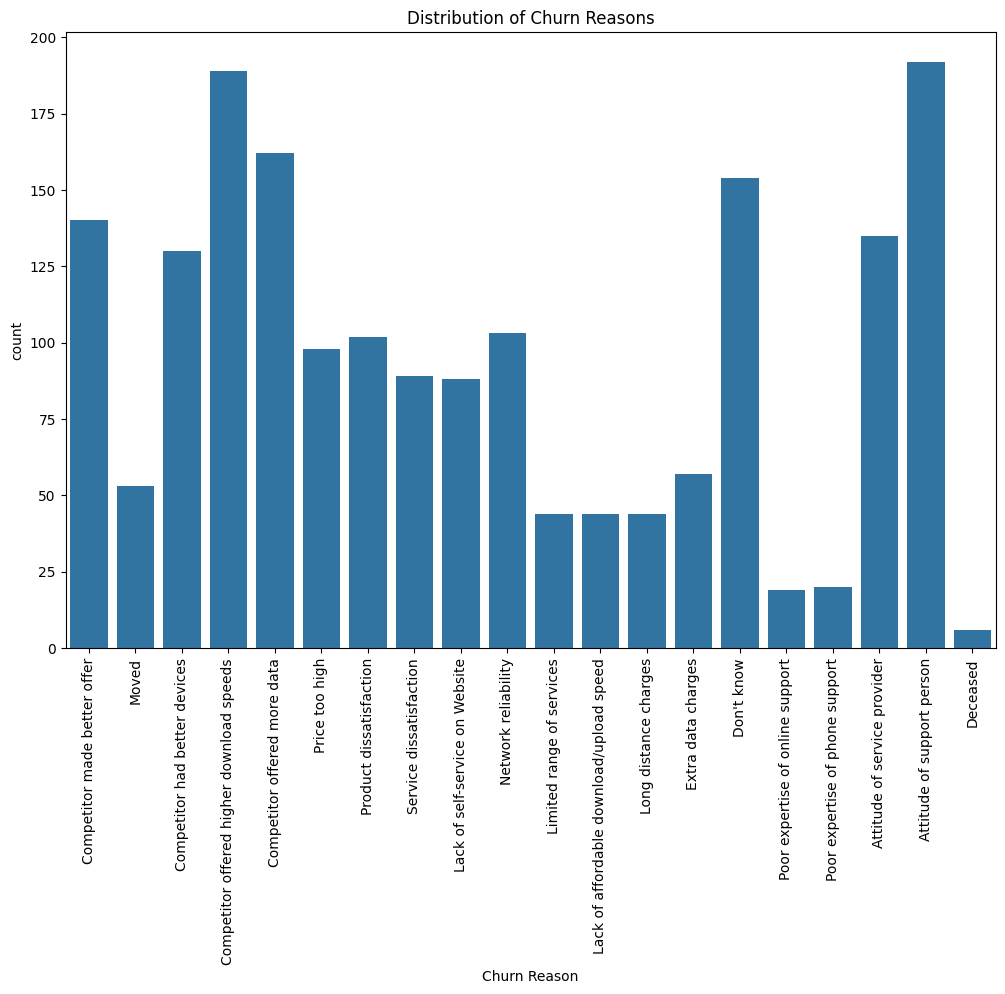

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of churn
plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
chart = sns.countplot(x='Churn Reason', data=df)
plt.title('Distribution of Churn Reasons')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Rotate labels for better readability
plt.show()

This bar graph displays various reasons customers have for churning from their telecom provider. It seems that the most common reason for churn, by a significant margin, is due to the competitor making a better offer, followed by reasons such as competitor had better devices, and competitor offered higher download speeds. Fewer customers left due to issues like network reliability, extra data charges, or poor expertise of support. The bars show the count of customers who have churned for each reason.

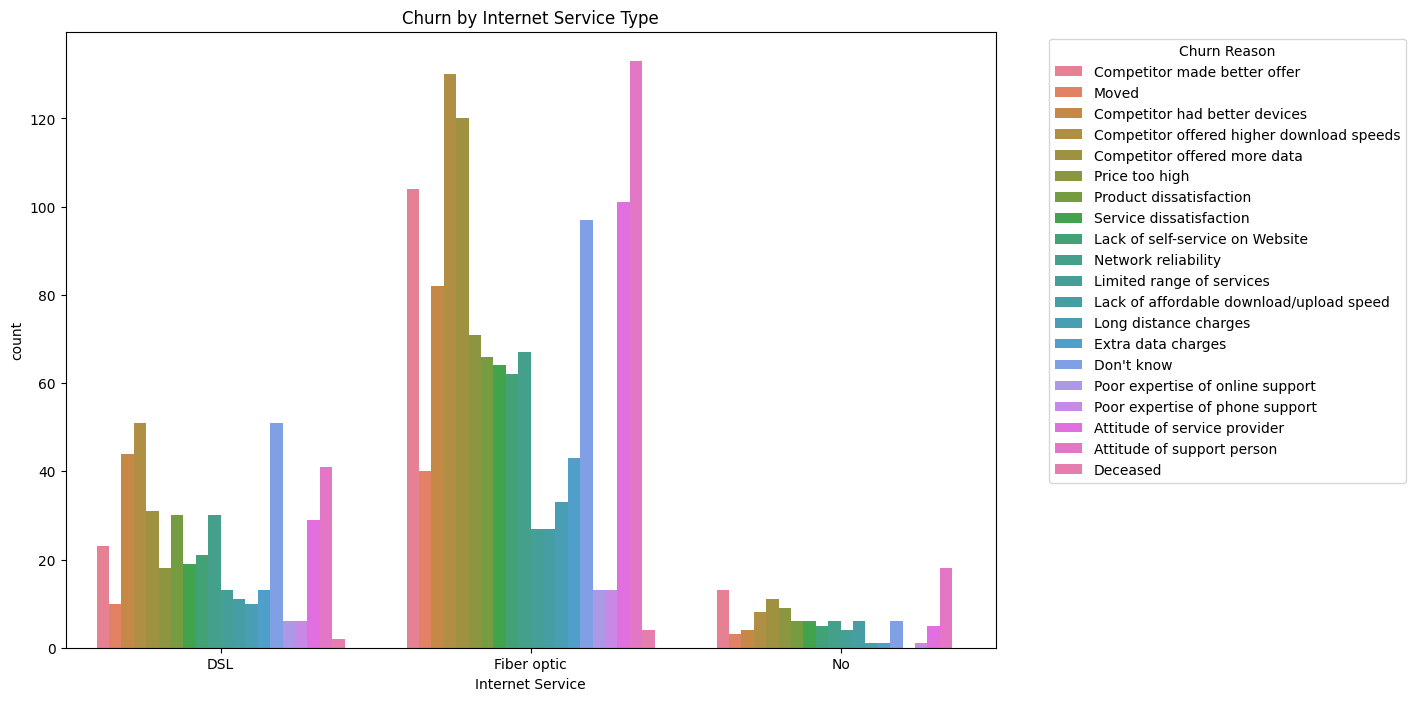

In [34]:
# Explore relationships between features and churn
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.countplot(x='Internet Service', hue='Churn Reason', data=df)
plt.title('Churn by Internet Service Type')
plt.legend(title='Churn Reason', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot
plt.show()

This clustered bar graph breaks down churn reasons by the type of internet service the customers had - DSL, Fiber optic, or No internet service. It is color-coded for each churn reason. The graph indicates that for customers with fiber optic service, churn reasons like competitor offers, price, and product dissatisfaction seem particularly prevalent. In contrast, those with DSL service appear to have a more diverse range of reasons with no single overwhelmingly dominant factor. Customers with no internet service have the least churn, suggesting that the type of internet service and the customers' satisfaction with it can be a significant factor in churn.

# **What is Casual Inference** ?

Causal inference in data science is a methodology used to determine the cause-and-effect relationship between variables. Unlike traditional statistical methods that focus on correlation (how closely two variables move together), causal inference seeks to understand whether a change in one variable actually causes a change in another. This distinction is crucial in many fields, such as medicine, economics, and social sciences, where understanding causality can inform policy decisions, treatment strategies, and more.

The key challenge in causal inference is distinguishing between correlation and causation. Just because two variables are correlated does not mean one causes the other; they might both be influenced by a third factor, or the causation might run in the opposite direction than assumed.


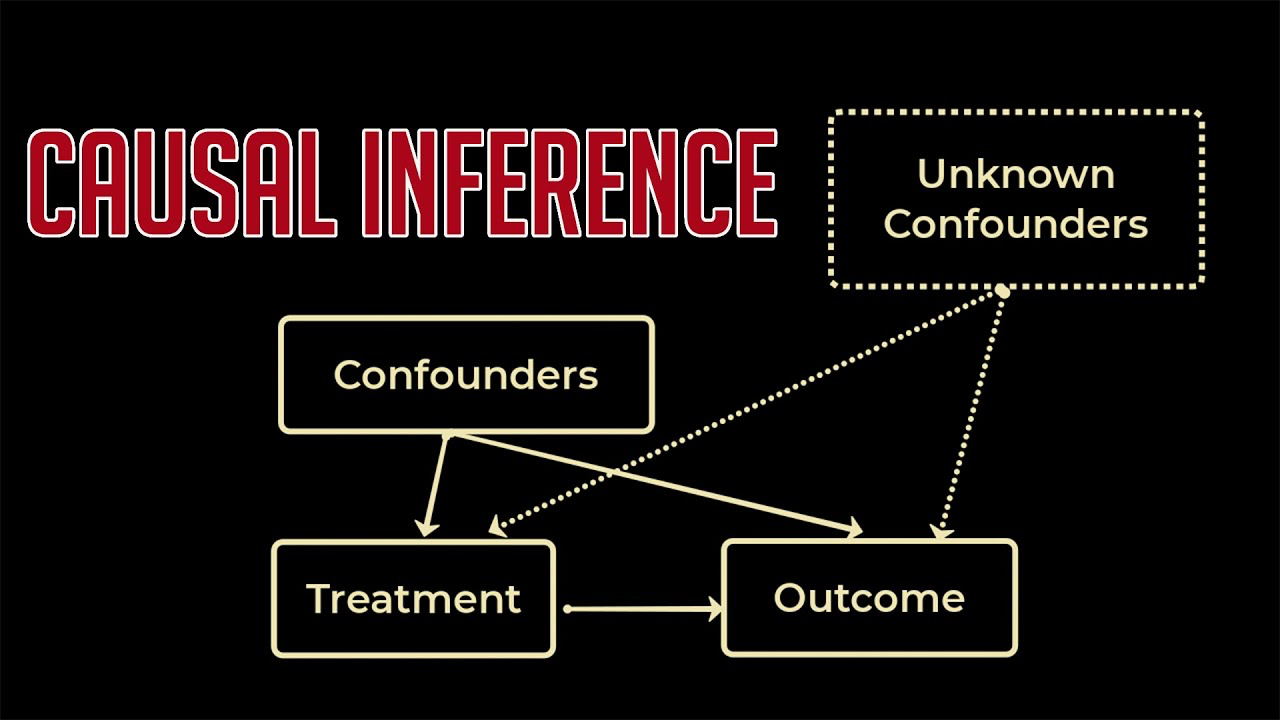

## **Causal Inference Powered Machine Learning**

The current evolution of machine learning towards grounding models in fundamental underlying structures rather than correlation-based associative links is not altogether very surprising. This fundamental underlying structure can be offered by causal inference, a set of mathematical tools to answer questions about causal relationships based on observational or experimental data by utilizing assumptions about the underlying system.

Causal inference can be distinguished into two fundamental tasks:

1. Utilizing qualitative causal knowledge for making causal predictions
2. Learning causal graphs (causal discovery)

Causal machine learning emerges at the crossroads of conventional machine learning and causal inference. On the one hand, identifying the causal graph of a prediction problem provides essential support for better machine learning models. On the other hand, established machine learning methods can be utilized within the framework of causal inference to learn causal relations or even causal variables.

Both can be understood as Causal Machine Learning.

# **Establishing Causality**
Several key principles and techniques are employed within data science and statistics to establish causality:

* **Counterfactuals:** Imagining what would happen to the same individual or system under a different scenario. For example, how would a person's health be if they didn't take a certain medication, compared to if they did?
* **Randomized Controlled Trials (RCTs):** Considered the gold standard for causal inference, where subjects are randomly assigned to treatment or control groups to directly measure the effect of the treatment.
* **Observational Studies:** When RCTs are not feasible, data scientists analyze observational data, using techniques to try to mimic the conditions of an RCT. This involves controlling for confounding variables that might affect the outcome.
* **Causal Models and Graphs:** Tools like Directed Acyclic Graphs (DAGs) help researchers visualize and reason about potential causal relationships and the direction of causality.
* **Propensity Score Matching:** A statistical technique that attempts to estimate the effect of a treatment by accounting for the covariates that predict receiving the treatment.
* **Difference-in-Differences (DiD):** A method that compares the before-and-after differences in outcomes between a treatment group and a control group.
* **Instrumental Variables:** Used when there is concern about an unobserved confounder, instrumental variables help to identify causal relationships by using a third variable that influences the independent variable but has no direct effect on the dependent variable.



# **Impacts of Causality on Data Modeling:**

* **Model Interpretation:** Causal relationships help in understanding the underlying mechanisms that drive observed data patterns. Models that incorporate causal relationships provide more meaningful interpretations of the relationships between variables.
* **Model Selection:** Causal inference aids in selecting appropriate variables and features for predictive modeling. By identifying causal factors, irrelevant variables can be excluded, leading to more parsimonious and interpretable models.
* **Bias Reduction:** Accounting for causality can help mitigate biases in data modeling. By identifying and adjusting for confounding variables, spurious correlations can be avoided, leading to more accurate and reliable models.
* **Predictive Performance:** Incorporating causal knowledge can improve the predictive performance of models. By focusing on causal factors, models can better capture the true relationships between variables and make more accurate predictions.
* **Policy Decisions:** Causal inference is essential for making informed policy decisions based on data analysis. Understanding causal relationships allows policymakers to identify effective interventions and strategies to achieve desired outcomes.
* **Counterfactual Analysis:** Causal modeling enables counterfactual analysis, which is the ability to estimate what would have happened under different conditions. This is valuable for scenario planning, policy evaluation, and understanding the impact of interventions.
* **Model Generalization:** Models based on causal relationships tend to generalize better to new data and contexts. By capturing underlying causal mechanisms, these models can be more robust across different populations and settings.

For causal inference, one approach is to use a technique that can quantify the impact of various features on churn. While there are many sophisticated methods for causal inference (e.g., propensity score matching, instrumental variable methods), a straightforward approach for an initial analysis is to use logistic regression to estimate the effect of different predictors on the likelihood of churn, controlling for other variables.

# **Confounding Variables**

* Confounding variables are factors other than the independent variable of interest that may affect the dependent variable. In causal inference, a confounder is a variable that both affects the outcome and is associated with the exposure or treatment.

* Confounders can create a false impression of a relationship between the exposure and the outcome if they are not properly controlled for. This is because they can cause or prevent the outcome, independent of the exposure, leading to an incorrect conclusion about the causal effect of the exposure.

To control for confounding variables, researchers use various methods, such as stratification, multivariable regression analysis where confounders are included as covariates, or more advanced techniques like instrumental variable analysis or propensity score matching, depending on the complexity of the data and the study design.

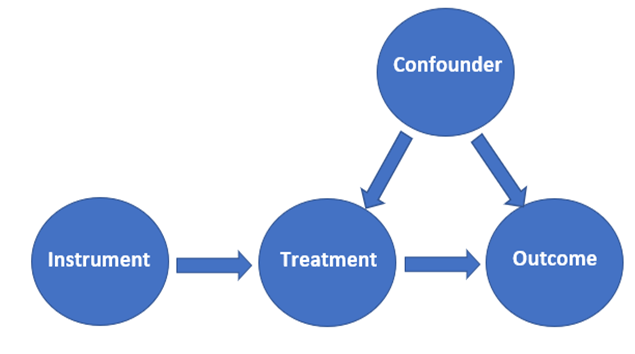

## **Causal Inference Method:**

Depending on the data and the presence of confounders, selecting an appropriate method for causal inference, such as:
* Regression analysis
* Instrumental variable analysis
* Propensity score matching
* Difference-in-differences
* Regression discontinuity design
* Causal diagrams and structural equation modeling

# **Regression Analysis**


Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

In [35]:
import statsmodels.api as sm

X = df[['Tenure Months', 'Monthly Charges', 'Internet Service']]  # Example predictor variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variable
y = df['Churn Value']  # Example outcome variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Churn Value   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -466.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               1.00
Time:                        01:55:26   Log-Likelihood:                 53733.
No. Observations:                1869   AIC:                        -1.075e+05
Df Residuals:                    1864   BIC:                        -1.074e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



* R-squared values of -inf and warnings about division by zero suggest that the linear regression model is not appropriate for the data either. This might occur if your dependent variable (Churn Value) does not vary at all (i.e., it is the same for all observations), or if there are issues with the data or model specification.
* Coefficients for the OLS regression are also extremely small and close to zero, and the p-values suggest that none of the predictors are significant in explaining the variance in Churn Value.


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame of predictors including the constant
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                        feature        VIF
0                         const  23.271368
1                 Tenure Months   1.390197
2               Monthly Charges   5.695975
3  Internet Service_Fiber optic   3.933873
4           Internet Service_No   1.560117



VIF values are used to check for multicollinearity among predictors. A rule of thumb is that a VIF above 5 or 10 indicates high multicollinearity. In the second image, the VIFs for Monthly Charges and Internet Service_Fiber optic are high, suggesting that these variables may be highly collinear with one or more of the other variables in the model.

In [37]:
# Simplify the model by selecting fewer variables
df_encoded = pd.get_dummies(df, columns=['Internet Service', 'Contract'])

X_simplified = df_encoded[['Tenure Months', 'Monthly Charges', 'Internet Service_Fiber optic', 'Contract_Two year']]


X_simplified = sm.add_constant(X_simplified)

# Assuming 'y' is your target variable already defined as 'Churn Value'
model_simplified = sm.Logit(y, X_simplified)

# Fit the simplified model
result_simplified = model_simplified.fit()

# Print the results
print(result_simplified.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 1869
Model:                          Logit   Df Residuals:                     1864
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                     inf
Time:                        01:55:26   Log-Likelihood:            -4.2960e-07
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.7758   1.19e+04      0.001      0.999   -2.34e+04    2.34e+04
Tenure Mont

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/dis


Coefficients and their standard errors are extremely large, which is another indicator of separation in the data. The p-values are all 1.00 (or close to it), suggesting that none of the predictors are statistically significant. However, this is not a valid conclusion because the model's assumptions are violated due to complete separation.

**For scatter plots with regression lines to visualize potential causal effects, we might look at Tenure Months vs. Monthly Charges to see if there's an observable trend suggesting that longer tenure affects monthly charges.**

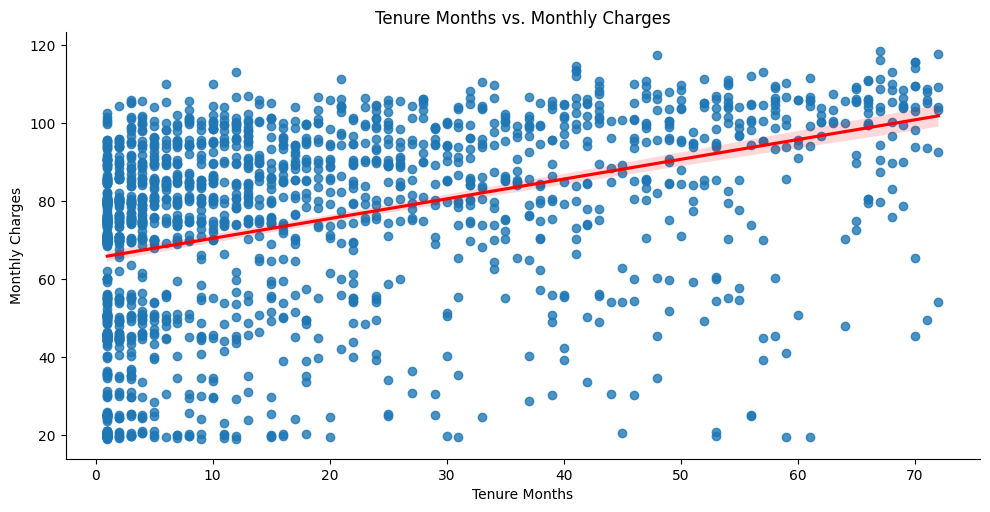

In [38]:
import seaborn as sns

# Assuming 'df' is the DataFrame with your data
sns.lmplot(x='Tenure Months', y='Monthly Charges', data=df, aspect=2, line_kws={'color': 'red'})
plt.title('Tenure Months vs. Monthly Charges')
plt.show()

This graph shows a scatter plot of 'Tenure Months' against 'Monthly Charges', with a regression line indicating the trend. The plot suggests that there is a positive relationship between the length of tenure and the monthly charges, which could imply that as customers stay longer with the service, their monthly charges increase, possibly due to service upgrades or the addition of new features.

**For residual plots, after fitting a regression model, you would plot the residuals to look for patterns:**

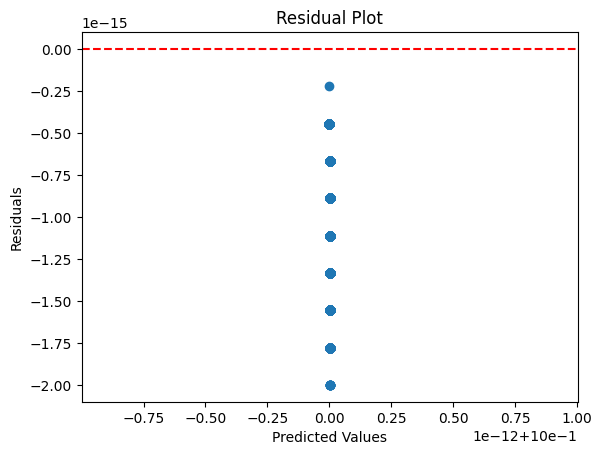

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Convert 'Tech Support' to numeric, assuming it's a binary categorical variable
df['Tech Support'] = df['Tech Support'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'Tenure Months', 'Monthly Charges', and 'Churn Value' are numeric
df['Tenure Months'] = pd.to_numeric(df['Tenure Months'], errors='coerce')
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'], errors='coerce')
df['Churn Value'] = pd.to_numeric(df['Churn Value'], errors='coerce')

# Drop any rows with NaN values that may have resulted from the conversion
df.dropna(subset=['Tenure Months', 'Monthly Charges', 'Tech Support', 'Churn Value'], inplace=True)

# Define the predictor variables and the response variable
X = df[['Tenure Months', 'Monthly Charges', 'Tech Support']]
y = df['Churn Value']

# Fit the OLS model
X = sm.add_constant(X)  # Adds a constant term to the predictors
est = sm.OLS(y, X).fit()

# Plot the residuals
residuals = est.resid
plt.scatter(est.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot is used to evaluate the goodness of fit for a regression model. It plots the residuals (the differences between observed and predicted values) against the predicted values. Ideally, you'd expect to see the residuals randomly dispersed around the horizontal line at zero, indicating that the model's predictions are unbiased. However, the plot you've shared shows a pattern that isn't centered around zero, which could indicate that the model isn't perfectly fitting the data.

In [40]:
!pip install causalinference
!pip install linearmodels

# **Instrumental Variable Analysis**
This method is used when the treatment is not randomly assigned and is correlated with the outcome through some confounder.

Instrumental Variable (IV) analysis is a statistical technique used primarily to address the problem of estimating causal relationships when controlled experiments are not feasible, particularly in the presence of confounding variables. It's a cornerstone method in econometrics, epidemiology, and social sciences, enabling researchers to infer causal effects from observational data. The core idea behind IV analysis lies in leveraging instruments, which are variables that are correlated with the independent variable of interest but are not directly related to the outcome, except through the independent variable.

In [41]:
from linearmodels.iv import IV2SLS

# Assuming 'instrument' is an instrument for 'Internet Service_Fiber optic'
iv_model = IV2SLS(
    dependent=df['Churn Value'],
    exog=df[['Monthly Charges', 'Tenure Months']],
    endog=df_encoded['Internet Service_Fiber optic'],
    instruments=df['Internet Service']
)

# Fit the IV model
iv_results = iv_model.fit()

# Print the summary of results
print(iv_results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            Churn Value   R-squared:                      0.9310
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9309
No. Observations:                1869   F-statistic:                 4.133e+04
Date:                Sun, Mar 24 2024   P-value (F-stat)                0.0000
Time:                        01:55:40   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                      Parameter Estimates                                       
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
Monthly Charges                  0.0190     0.0002     77.390     0.0000     

This is likely the output from a two-stage least squares (2SLS) regression, which is used in the context of instrumental variables (IV) analysis. The goal here is to estimate the causal effect of an endogenous variable (one affected by omitted variable bias) on the outcome of interest by using instruments that are correlated with the endogenous variables but not with the error term. The output generally includes the coefficients, standard errors, t-statistics, and p-values for the included variables and indicates whether the instruments are valid based on the F-statistic and p-value.

# **Propensity Score Matching**
This method attempts to control for confounding in observational data by matching treated and untreated units with similar propensity scores.

Propensity Score Matching (PSM) is a statistical technique used to estimate the effect of a treatment, policy, or intervention by accounting for the covariates that predict receiving the treatment. It is widely used in observational studies where randomized controlled trials are not feasible, allowing researchers to mimic some of the characteristics of a randomized controlled trial. PSM aims to reduce bias due to confounding variables that could affect the assignment to the treatment group and the control group.

In [42]:
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel

# Estimate propensity scores
propensity_model = LogisticRegression()
X_propensity = df[['Monthly Charges', 'Tenure Months']]
propensity_model.fit(X_propensity, df_encoded['Internet Service_Fiber optic'])
df['propensity_score'] = propensity_model.predict_proba(X_propensity)[:, 1]

# Use the CausalModel from the `causalinference` package for matching
causal = CausalModel(
    Y=df['Churn Value'].values,
    D=df_encoded['Internet Service_Fiber optic'].values,
    X=df['propensity_score'].values
)

causal.est_via_matching(bias_adj=True)
print(causal.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.000      0.000      0.024      0.981     -0.000      0.000
           ATC      0.000      0.000      2.200      0.028      0.000      0.000
           ATT     -0.000      0.000     -1.745      0.081     -0.000      0.000



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


This would be an output from a causal inference model attempting to estimate the average treatment effect (ATE), average treatment effect on the treated (ATT), and average treatment effect on the control group (ATC). These are used to understand the impact of an intervention by comparing the outcomes of the treated and control groups. The results typically include the estimate, its standard error, the z-statistic, the p-value for the z-statistic, and the confidence interval for the estimate.

# **Difference-in-Differences**
This method is typically used when you have repeated measurements before and after a treatment for both a treatment group and a control group.

Difference-in-Differences (DiD) is a statistical technique used to estimate the causal effect of a policy intervention or treatment by comparing the changes in outcomes over time between a group that is exposed to the intervention (treatment group) and a group that is not (control group). This method is widely used in econometrics, public policy, and social sciences, especially when randomized controlled trials are not feasible.

The basic premise of DiD is to observe the differences in outcomes across two groups before and after an intervention, thereby controlling for all time-invariant differences between the groups, as well as common trends affecting both groups over time. This approach helps in isolating the effect of the intervention from other factors that could affect the outcome.

In [43]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')
df['treatment'] = (df['Churn Label'] == 'Yes').astype(int)

# Create a binary time period indicator based on your specific context
# For example, assuming a specific tenure month as the cutoff for before and after
# This is a placeholder; you'll need to adjust this based on your dataset
cutoff_month = 12  # Placeholder value
df['post_treatment'] = (df['Tenure Months'] > cutoff_month).astype(int)

# The outcome variable
df['outcome'] = df['Churn Value']  # Assuming this is already correctly set up

if df.empty:
    print("DataFrame is empty. Check data loading and preparation steps.")
else:
    # Check for the existence and non-emptiness of necessary columns
    if set(['outcome', 'treatment', 'post_treatment']).issubset(df.columns):
        # Conducting DiD analysis
        try:
            did_model = smf.ols(formula='outcome ~ treatment * post_treatment', data=df).fit()
            print(did_model.summary())
        except Exception as e:
            print(f"Error in model fitting: {e}")
    else:
        print("One or more required columns are missing or empty.")

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.288e+31
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:55:40   Log-Likelihood:             2.2069e+05
No. Observations:                7043   AIC:                        -4.414e+05
Df Residuals:                    7039   BIC:                        -4.413e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

* **Dependent Variable:** Outcome (not clearly specified what outcome is, assuming it's related to Churn as well)
* **Method:** OLS, using nonrobust covariance type
* **Number of Observations:** 7043
* **Coefficients:**
    * **Intercept:** Extremely close to zero, effectively indicating no constant term (might be due to the scaling of variables).
    * **treatment:** Coefficient of 1.0000, implying a one-unit change in treatment is associated with a one-unit change in the outcome. Given the magnitude and the P-value, it seems there might be an issue with the coding of the variable or a very large effect size.
    * **post_treatment:** Coefficient close to zero, which suggests the post-treatment time period by itself does not have a significant effect on the outcome.
    * **treatment:post_treatment:** The interaction term is not significant (P-value of 0.715), suggesting there is no additional effect of the treatment in the post-treatment period beyond what is captured by the main effects.

The Adjusted R-squared of 1.000 indicates a perfect fit, which is highly unusual in real-world data and may suggest overfitting or an error in the model specification.

# **Regression Discontinuity Design**
This method is used when the assignment to treatment is based on a cutoff in a running variable.

Regression Discontinuity Design (RDD) is a quasi-experimental research design that is used to estimate the causal effect of a treatment, intervention, or policy by exploiting a cutoff point which determines who receives the treatment and who does not. Unlike randomized experiments, RDD acknowledges that the assignment to treatment is not random but can be considered as locally randomized around the cutoff point. This design is particularly useful when ethical or practical considerations prevent the implementation of a fully randomized control trial.

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')
print(df.head())  # Check the first few rows of your DataFrame
print(X.head())   # Check the first few rows of your independent variables
print(y.head())   # Check the first few rows of your dependent variable

# Check for column existence
print('Churn Score' in df.columns)  # Should be True
print('Churn Value' in df.columns)  # Should be True

# Check for any NaN values in these key columns
print(df[['Churn Score', 'Churn Value']].isnull().sum())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [45]:
# Proceed with the RDD analysis
cutoff = 0.5  # Define the cutoff value

# Creating the treatment indicator and running variable
df['treatment'] = (df['Churn Score'] >= cutoff).astype(int)
df['running_variable'] = df['Churn Score'] - cutoff

# Preparing the data for regression
X = df[['treatment', 'running_variable']]
y = df['Churn Value']  # Assuming 'Churn Value' is your outcome variable
X = sm.add_constant(X)  # Adding a constant term for the intercept

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Churn Value   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     5579.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:55:40   Log-Likelihood:                -2180.9
No. Observations:                7043   AIC:                             4366.
Df Residuals:                    7041   BIC:                             4379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
treatment           -0.5284      0.011  

* **Dependent Variable:** Churn Value
* **Method:** OLS, using nonrobust covariance type (standard errors may not be robust to violations of homoscedasticity or other assumptions)
* **Number of Observations:** 7043
* **Coefficients:**
  * **treatment:** The coefficient of -0.5284 suggests that the treatment group has a 0.5284 unit lower 'Churn Value' on average compared to the control group, holding other variables constant. The P-value of 0.000 indicates this result is statistically significant.
  * **running_variable:** The coefficient of 0.0136 indicates that for each unit increase in the running variable, 'Churn Value' increases by 0.0136 units, holding other variables constant. This is also statistically significant.
  
The high F-statistic and its associated P-value of 0.00 suggest the model as a whole is statistically significant.

# **Causal Diagrams and Structural Equation Modeling**
This involves creating diagrams to represent causal relationships and using statistical models to estimate these relationships.

## **Directed Acyclic Graph (DAG)**

 To visualize potential causal relationships. Since we can't determine causality purely from data without the context of a theoretical framework or experimental design, we'll make some common-sense assumptions for illustration purposes. For example, we might hypothesize that Tenure Months, Monthly Charges, and Tech Support have a direct effect on Churn Value.

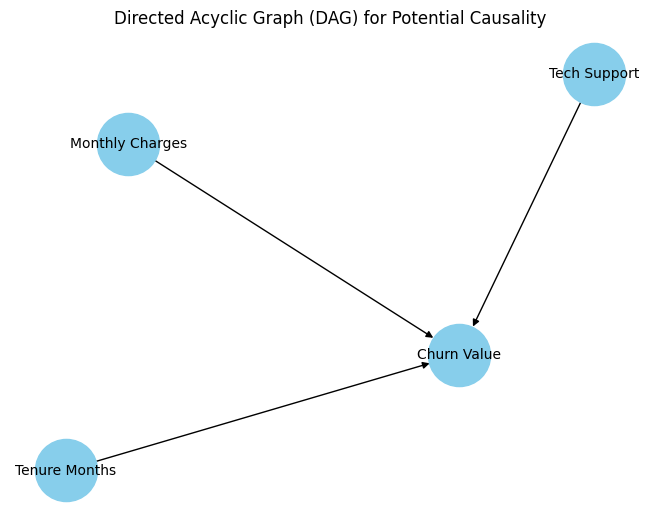

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes (representing variables) to the graph
G.add_nodes_from(['Tenure Months', 'Monthly Charges', 'Tech Support', 'Churn Value'])

# Add directed edges (representing causal relationships) to the graph
G.add_edge('Tenure Months', 'Churn Value')
G.add_edge('Monthly Charges', 'Churn Value')
G.add_edge('Tech Support', 'Churn Value')

# Draw the graph
pos = nx.layout.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
plt.title('Directed Acyclic Graph (DAG) for Potential Causality')
plt.show()

The DAG depicts the presumed causal relationships between 'Tech Support', 'Tenure Months', 'Monthly Charges', and 'Churn Value'. It suggests that 'Tech Support' and 'Tenure Months' might directly affect the churn, while 'Monthly Charges' also play a role. The purpose of this graph in your assignment would be to illustrate the hypothesized pathways through which different factors could influence a customer's decision to churn.

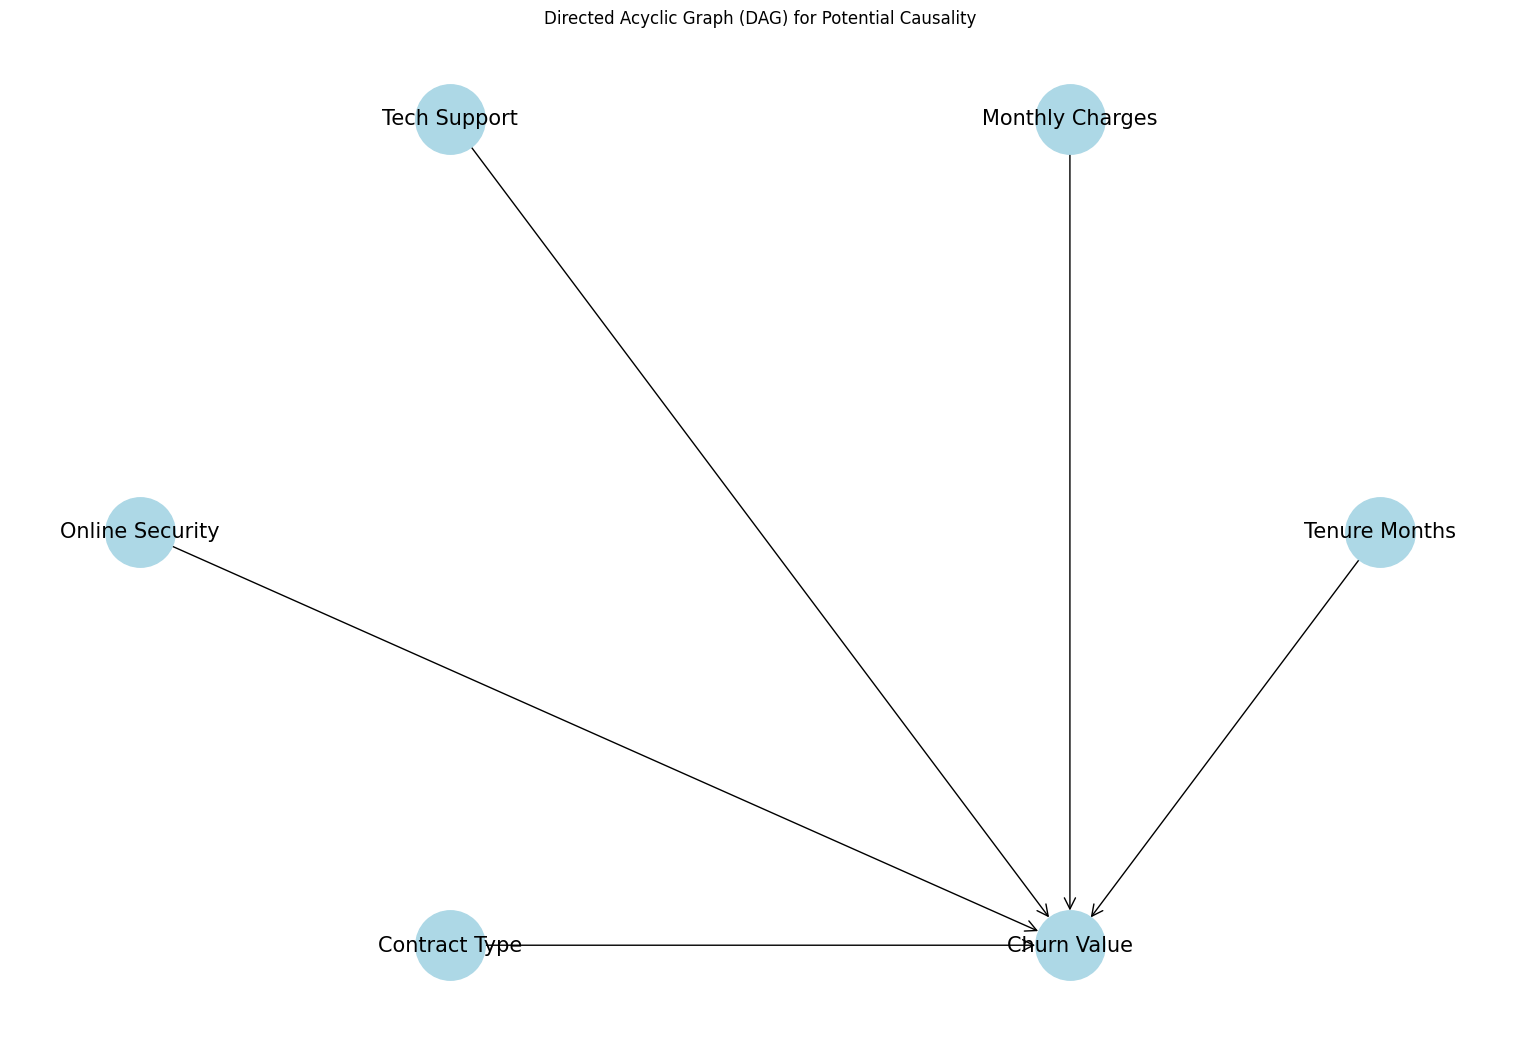

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes (representing variables) to the graph
nodes_to_add = ['Tenure Months', 'Monthly Charges', 'Tech Support', 'Online Security',
                'Contract Type', 'Churn Value']
G.add_nodes_from(nodes_to_add)

# Add directed edges (representing causal relationships) to the graph
edges_to_add = [('Tenure Months', 'Churn Value'),
                ('Monthly Charges', 'Churn Value'),
                ('Tech Support', 'Churn Value'),
                ('Online Security', 'Churn Value'),
                ('Contract Type', 'Churn Value')]
G.add_edges_from(edges_to_add)

# Create a layout for our nodes
layout = nx.circular_layout(G)

# Draw the graph with the layout
nx.draw(G, layout, with_labels=True, node_size=2500, node_color='lightblue', font_size=15, arrowstyle='->', arrowsize=20)

# Add titles and labels
plt.title('Directed Acyclic Graph (DAG) for Potential Causality')

# Increase plot size
plt.gcf().set_size_inches(15, 10)

# Show the graph
plt.show()

A DAG visualizes potential causal relationships between variables. Each node represents a variable, such as 'Tenure Months', 'Monthly Charges', 'Tech Support', 'Online Security', and 'Contract Type'. Arrows indicate the direction of the presumed causal influence. For instance, 'Tenure Months' may have a directed edge to 'Churn Value', suggesting that the length of tenure might influence the likelihood of churn.

# **Conclusion**

Causality in data science and statistics is about moving beyond correlations to understand the cause-and-effect relationships that underpin the phenomena observed in data. This understanding is crucial for predicting outcomes, making informed decisions, and advancing scientific knowledge.

Numerous data scientists, along with anyone engaged in data analysis, will attest to the blend of artistry and scientific rigor required in deriving insights from data. This evolving discipline, often referred to as the "new science of cause and effect," offers a theoretical foundation that guides the nuanced art of data interpretation. Despite the significant progress made, the realm of causality remains in its nascent stages, presenting several unresolved challenges.

The forefront of causality, akin to the field of machine learning, is continually advancing.

Understanding and preparing data is a foundational step in conducting robust causal analysis in machine learning. By ensuring data quality and addressing common issues, researchers can enhance the reliability and validity of their causal inferences.


**References :**

https://medium.com/causality-in-data-science/why-machine-learning-needs-causality-3d33e512cd37

https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a

https://en.wikipedia.org/wiki/Causal_inference

https://chat.openai.com/share/6b7ff1ca-9080-4651-b089-365d50d7d6a5


**License**

Copyright 2024 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.